# Tensorflow-quantum Iris dataset categorization
Starting with imports

In [1]:
import tensorflow as tf
import tensorflow_quantum as tfq
from tensorflow.keras import layers
import pandas as pd
import cirq
import numpy as np
from cirq.contrib.svg import SVGCircuit
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

2023-06-09 03:02:43.030172: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-09 03:02:43.156794: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-09 03:02:43.156812: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-09 03:02:43.795681: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

Loading the data:

In [2]:
dataFolder = 'data/'
dataFile = dataFolder + "iris_csv.csv"
print(dataFile)

data/iris_csv.csv


Creating pandas dataframe:

In [3]:
df = pd.read_csv(dataFile)
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Slicing data for training

In [4]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [5]:
print(X[0:5])
print(y[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


In [6]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


Encoding the labels into numbers

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

In [8]:
print(y1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Splitting data into train and test parts:

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=0)

In [11]:
print(X_train[0:5])

[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]]


Encoding the data into quantum circuits:

In [12]:
def convert_to_circuit(data):
    """Encode truncated classical image into quantum datapoint."""
    values = data
    qubits = cirq.GridQubit.rect(4, 1)
    circuit = cirq.Circuit()
    for i, value in enumerate(values):
        gate = cirq.Ry(rads=value)
        circuit.append(gate.on(qubits[i]))

    return circuit

In [13]:
x_train_circ = [convert_to_circuit(x) for x in X_train]
x_test_circ = [convert_to_circuit(x) for x in X_test]

In [14]:
print(x_train_circ[0])

(0, 0): ───Ry(-1.96π)───

(1, 0): ───Ry(0.987π)───

(2, 0): ───Ry(1.75π)────

(3, 0): ───Ry(0.573π)───


Converting to tensorflow tensors:

In [15]:
x_train_tfcirc = tfq.convert_to_tensor(x_train_circ)
x_test_tfcirc = tfq.convert_to_tensor(x_test_circ)

Writing a dunction to build a quantum layer:

In [16]:
import sympy


class CircuitLayerBuilder():
    def __init__(self, data_qubits, readout):
        self.data_qubits = data_qubits
        self.readout = readout

    def add_layer(self, circuit, gate, prefix):
        for i, qubit in enumerate(self.data_qubits):
            symbol = sympy.Symbol(prefix + '-' + str(i))
            circuit.append(gate(qubit, self.readout)**symbol)


Creating demo circuit to visualize it:

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


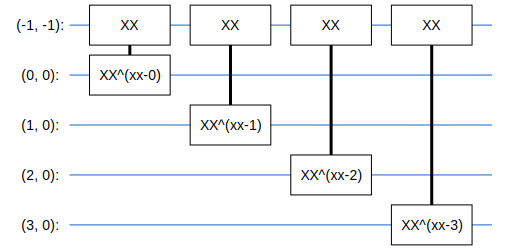

In [17]:
demo_builder = CircuitLayerBuilder(data_qubits = cirq.GridQubit.rect(4,1),
                                   readout=cirq.GridQubit(-1,-1))

circuit = cirq.Circuit()
demo_builder.add_layer(circuit, gate = cirq.XX, prefix='xx')
SVGCircuit(circuit)

Creating our quantum NN model:

In [18]:
def create_quantum_model():
    """Create a QNN model circuit and readout operation to go along with it."""
    data_qubits = cirq.GridQubit.rect(4, 1)  # a 4x1 grid.
    readout = cirq.GridQubit(-1, -1)         # a single qubit at [-1,-1]
    circuit = cirq.Circuit()

    # Prepare the readout qubit.
    circuit.append(cirq.X(readout))
    circuit.append(cirq.H(readout))

    builder = CircuitLayerBuilder(
        data_qubits = data_qubits,
        readout=readout)

    # Then add layers (experiment by adding more).
    builder.add_layer(circuit, cirq.XX, "xx1")
    builder.add_layer(circuit, cirq.ZZ, "zz1")

    # Finally, prepare the readout qubit.
    circuit.append(cirq.H(readout))

    return circuit, cirq.Z(readout)


In [19]:
model_circuit, model_readout = create_quantum_model()


Building the Keras model with our quantum layer:

In [20]:
# Build the Keras model.
model = tf.keras.Sequential([
    # The input is the data-circuit, encoded as a tf.string
    tf.keras.layers.Input(shape=(), dtype=tf.string),
    # The PQC layer returns the expected value of the readout gate, range [-1,1].
    tfq.layers.PQC(model_circuit, model_readout),
])

Creating function for accuracy and compiling our model:

In [21]:
def hinge_accuracy(y_true, y_pred):
    y_true = tf.squeeze(y_true) > 0.0
    y_pred = tf.squeeze(y_pred) > 0.0
    result = tf.cast(y_true == y_pred, tf.float32)

    return tf.reduce_mean(result)

In [22]:
model.compile(
    loss=tf.keras.losses.Hinge(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[hinge_accuracy])


In [23]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 pqc (PQC)                   (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


Training our model with our data encoded into quantum circuits:

In [24]:
EPOCHS = 100
BATCH_SIZE = 50


In [25]:
qnn_history = model.fit(
      x_train_tfcirc, y_train,
      batch_size=BATCH_SIZE,
      epochs=EPOCHS,
      verbose=1,
      validation_data=(x_test_tfcirc, y_test))

qnn_results = model.evaluate(x_test_tfcirc, y_test)

Epoch 1/100
3/3 [==============================] - 1s 110ms/step - loss: 0.8111 - hinge_accuracy: 0.6133 - val_loss: 0.8735 - val_hinge_accuracy: 0.5667
Epoch 2/100
3/3 [==============================] - 0s 23ms/step - loss: 0.8012 - hinge_accuracy: 0.6567 - val_loss: 0.8654 - val_hinge_accuracy: 0.6000
Epoch 3/100
3/3 [==============================] - 0s 23ms/step - loss: 0.7913 - hinge_accuracy: 0.6500 - val_loss: 0.8574 - val_hinge_accuracy: 0.6333
Epoch 4/100
3/3 [==============================] - 0s 24ms/step - loss: 0.7810 - hinge_accuracy: 0.6633 - val_loss: 0.8491 - val_hinge_accuracy: 0.6333
Epoch 5/100
3/3 [==============================] - 0s 23ms/step - loss: 0.7711 - hinge_accuracy: 0.6433 - val_loss: 0.8406 - val_hinge_accuracy: 0.6333
Epoch 6/100
3/3 [==============================] - 0s 25ms/step - loss: 0.7606 - hinge_accuracy: 0.6533 - val_loss: 0.8320 - val_hinge_accuracy: 0.6333
Epoch 7/100
3/3 [==============================] - 0s 23ms/step - loss: 0.7496 - hinge_

Printing the achieved accuracy:

In [26]:
qnn_accuracy = qnn_results[1]

In [27]:
print(qnn_accuracy)

0.6333333253860474
